In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
birddata = pd.read_csv("C:/Users/PUNITA/Downloads/bird_tracking.csv")
birddata


,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
...,...,...,...,...,...,...,...,...
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


In [7]:
bird_names = pd.unique(birddata.bird_name)
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

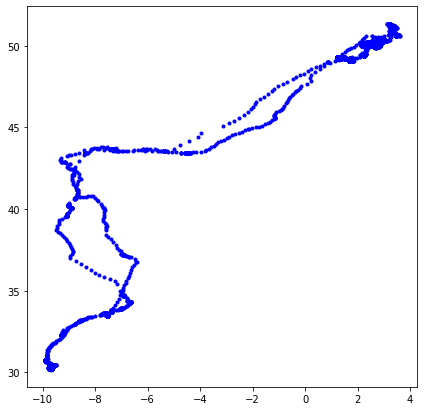

In [12]:
ix = birddata.bird_name == "Eric"
x,y = birddata.longitude[ix], birddata.latitude[ix]
plt.figure(figsize = (7,7))
plt.plot(x,y,"b.")

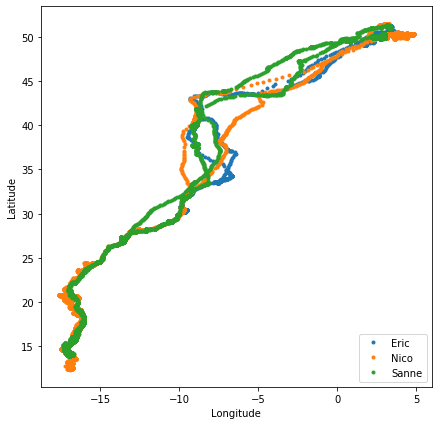

In [13]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y,".",label = bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.show()

In [15]:
ix= birddata.bird_name == "Eric"
speed= birddata.speed_2d[ix]
speed

0        0.150000
1        2.438360
2        0.596657
3        0.310161
4        0.193132
           ...   
19790    0.064031
19791    1.942395
19792    1.678392
19793    0.208087
19794    0.056569
Name: speed_2d, Length: 19795, dtype: float64

In [17]:
plt.figure(figsize = (8,4))
ind = np.isnan(speed)
ind

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

<Figure size 576x288 with 0 Axes>

C:\Users\PUNITA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


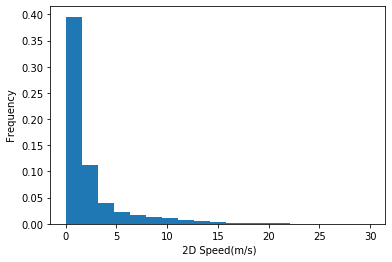

In [19]:
plt.hist(speed[~ind],bins = np.linspace(0,30,20),normed=True)
plt.xlabel(" 2D Speed(m/s)")
plt.ylabel(" Frequency ")
plt.show()

In [27]:
birddata.date_time[0:3]
import datetime
time1 = datetime.datetime.today()
time1

datetime.datetime(2020, 6, 2, 18, 2, 8, 715084)

In [33]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3],"%Y-%m-%d %H:%M:%S"))

In [36]:
birddata["timestamp"] = pd.Series(timestamps,index = birddata.index)
times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time-times[0] for time in times]
elapsed_time
times

0       2013-08-15 00:18:08
1       2013-08-15 00:48:07
2       2013-08-15 01:17:58
3       2013-08-15 01:47:51
4       2013-08-15 02:17:42
                ...        
19790   2014-04-30 21:51:26
19791   2014-04-30 22:21:33
19792   2014-04-30 22:51:41
19793   2014-04-30 23:21:34
19794   2014-04-30 23:51:29
Name: timestamp, Length: 19795, dtype: datetime64[ns]

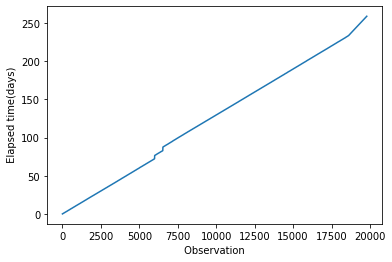

In [37]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1) )
plt.xlabel(" Observation ")
plt.ylabel(" Elapsed time(days)")
plt.show()

In [38]:
elapsed_days =  np.array(elapsed_time)/datetime.timedelta(days=1)

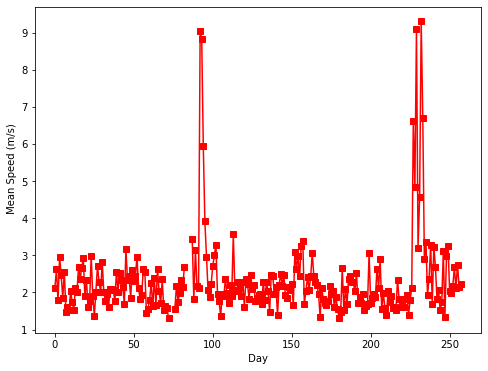

In [41]:
data = birddata[birddata.bird_name == "Eric"]
next_day = 1
inds = []
daily_mean_speed = []

for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []
plt.figure(figsize = (8,6))
plt.plot(daily_mean_speed, "rs-")
plt.xlabel(" Day ")
plt.ylabel(" Mean Speed (m/s)")
plt.show()
        

In [44]:
import cartopy.crs  as ccrs
import cartopy.feature as cfeature

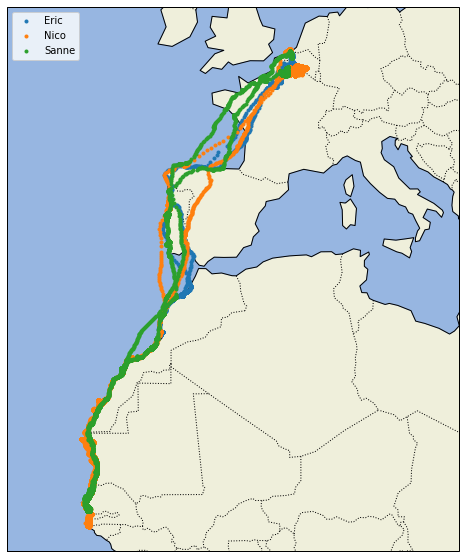

In [48]:
proj = ccrs.Mercator()
plt.figure(figsize = (10,10))
ax= plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
for name in bird_names:
    ix=birddata.bird_name == name
    x,y= birddata.longitude[ix],birddata.latitude[ix]
    ax.plot(x,y,'.',transform= ccrs.Geodetic(), label= name )
plt.legend(loc="upper left")
plt.show()